# ch13 使用PCA简化数据

数据降维，基于以下几点原因：、

- 使数据集易使用
- 降低算法计算开销
- 去除噪声
- 结果易懂

**降维技术1——主成分分析法PCA

PCA中，数据从原来的坐标系转变到新的坐标系，新坐标系的选择是基于数据集本身：

- 第一个坐标系选择原始数据集方差最大的方向；
- 第二给坐标系的选择和第一个坐标系正交，且具有次最大方差的方向；
- 一直重复，重复次数为原数据集中特征的数目。

**降维技术2——因子分析factor analysis**

FA方法中，假设有一些“隐藏变量”,假设数据是这些隐藏变量的线性组合。

隐藏变量的数据可能比原数据要少，所以找到隐藏变量就可以实现数据降维。

**降维技术3——独立成分分析ICA**

ICA假设数据是从N个源数据生成的，假设数据是由多个源数据混合的结果，而且源数据之间是相互独立的，

如果源数据数目少于观察数据的数目，则可以实现降维，


## 13.2 PCA

优点：降低数据复杂性，识别多个特征

缺点：可能损失有用信息

适用于：数值型数据

将数据转换为N个主成分的伪代码：
```
去除平均值
计算协方差矩阵
计算协方差矩阵的特征值和特征向量
将特征值从小到大排序，保留前N个
将数据转换到这N个特征向量构建的新空间中

```

代码：

In [1]:
import numpy as np 

In [11]:
# 加载数据
def loadData0(filename,delim='\t'):
    fr=open(filename)
    # 构建矩阵
    stringArr=[]
    for line in fr.readlines():
        curLine=line.strip().split(delim)
        stringArr.append(curLine)
    dataArr=[]
    for line in stringArr:
        dataArr.append(list(map(float,line)))
    return np.mat(dataArr)

In [29]:
# 加载数据
def loadData(filename,delim='\t'):
    fr=open(filename)
    stringArr=[line.strip().split(delim) for line in fr.readlines()]
    dataArr=[list(map(float,line)) for line in stringArr]
    return np.array(dataArr)

In [13]:
# PCA
def pca(dataArr,topN=9999999):
    """
    dataArr为数据集
    topN参数可选，表示应用的N个特征，
    或原数据中全部特征
    """
    # 首先减去原始数据集的平均值
    # 然后计算协方差矩阵及其特征值
    # 使用argsort()函数对特征值排序，得到其索引，
    # 选择前TOPN个特征向量构成转换矩阵
    # 使用转换矩阵，将数据转换到新空间中，返回转换后的数据集，即为降维数据集。
    # 1 去除平均值
    meanVal=np.mean(dataArr,axis=0)
    newArr=dataArr-meanVal
    # 协方差矩阵
    covMat=np.cov(np.mat(newArr),rowvar=0)
    # 计算特征值和特征向量
    eigVal,eigVec=np.linalg.eig(np.mat(covMat))
    # 按照特征值从小到大进行排序
    index=np.argsort(eigVal)
    # 只取N个最大的特征值
    index=index[:-(topN+1):-1]
    # N个特征值对应的特征向量
    vecArr=eigVec[:,index]
    # 低维度数据集
    lowDataMat=np.mat(newArr)*vecArr
    # 新数据集
    retDataArr=(lowDataMat*vecArr.T)+meanVal
    return lowDataMat,retDataArr

In [37]:
# test

data1=loadData('./testSet.txt')
lowData,reconMat=pca(data1,1)

In [38]:
lowData.shape

(1000, 1)

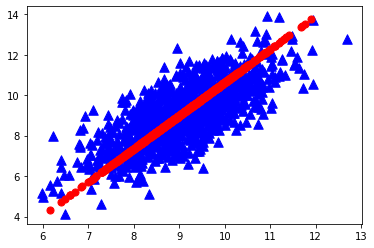

In [40]:
# 效果图
import matplotlib.pyplot as plt 
fig=plt.figure()
# 子图
ax=fig.add_subplot(111)
ax.scatter(data1[:,0],data1[:,1],marker='^',s=90,c='b')
ax.scatter(np.array(reconMat[:,0]),np.array(reconMat[:,1]),marker='o',s=50,c='r')
plt.show()

## 13.3 利用PCA对半导体制造数据降维


In [41]:
# 将所有的NaN值替换为平均值


In [58]:
import pandas as pd

# 文件中第一行不是索引 
data2=pd.read_csv('./secom.data',sep=' ',header=None,index_col=None)

In [67]:
print(data2.shape)
print(data2[:2])
data2.mean(axis=0)

(1567, 590)
       0        1          2          3       4      5         6       7    \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   

      8       9    ...    580       581     582     583     584     585  \
0  1.5005  0.0162  ...    NaN       NaN  0.5005  0.0118  0.0035  2.3630   
1  1.4966 -0.0005  ...  0.006  208.2045  0.5019  0.0223  0.0055  4.4447   

      586     587    588       589  
0     NaN     NaN    NaN       NaN  
1  0.0096  0.0201  0.006  208.2045  

[2 rows x 590 columns]


0      3014.452896
1      2495.850231
2      2200.547318
3      1396.376627
4         4.197013
          ...     
585       3.067826
586       0.021458
587       0.016475
588       0.005283
589      99.670066
Length: 590, dtype: float64

In [71]:
# 计算每一列的均值，并填充NaN值
for i in range(data2.shape[1]):
    # 第i列
     data2[i]=data2[i].fillna(data2[i].mean(),)    


In [75]:
# print(data2.mean(axis=0))
print(data2[:1])
data2.describe

       0       1          2          3       4      5        6       7    \
0  3030.93  2564.0  2187.7333  1411.1265  1.3602  100.0  97.6133  0.1242   

      8       9    ...       580        581     582     583     584    585  \
0  1.5005  0.0162  ...  0.005396  97.934373  0.5005  0.0118  0.0035  2.363   

        586       587       588        589  
0  0.021458  0.016475  0.005283  99.670066  

[1 rows x 590 columns]


<bound method NDFrame.describe of           0        1          2          3       4      5         6       7    \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
...       ...      ...        ...        ...     ...    ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843  100.0   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763  100.0   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236  100.0   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726  100.0   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978  100.0   85.1011  0.12

In [76]:
# 转为矩阵
dataArr2=np.array(data2)


In [84]:
def plot(dataMat):
    #below is a quick hack copied from pca.pca()
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals 
    #remove mean
    covMat = np.cov(meanRemoved, rowvar=0)
    # 特征值与特征向量
    eigVals,eigVects = np.linalg.eig(np.mat(covMat))
    # 排序，取N个最大的特征值及其特征向量
    eigValInd = np.argsort(eigVals)
    # reverse
    eigValInd = eigValInd[::-1]
    sortedEigVals = eigVals[eigValInd]
    # 记录方差变化
    total = np.sum(sortedEigVals)
    varPercentage = sortedEigVals/total*100
    # 画出方差变化与特征个数的关系图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(1, 21), varPercentage[:20], marker='^')
    plt.xlabel('Principal Component Number')
    plt.ylabel('Percentage of Variance')
    plt.show()

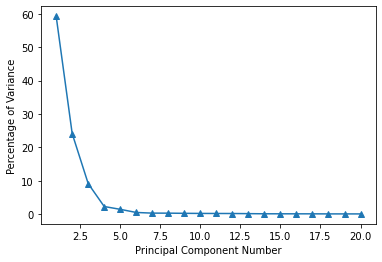

In [85]:
plot(data2)

从方差百分比与主成分个数之间的关系可以看出，大概只需要6个特征，就可以包括大部分的
方差，射窃后面的成分并不会损失太多信息。

如果保留前6个主成分，则数据集就实现了从590个特征简化到6个特征，实现了近100：1的压缩。